In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
archivo = pd.read_csv('Call_Center_1999_DataSet.csv', sep=';')
archivo

C:\Users\aylen\AppData\Local\Temp\ipykernel_9504\2714530337.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  archivo = pd.read_csv('Call_Center_1999_DataSet.csv', sep=';')


,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0
3,AA0101,33119,0.0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0
4,AA0101,33120,0.0,0,PS,1999-01-01,8:03:14,8:03:24,10,0:00:00,0:00:00,0,AGENT,8:03:23,8:05:10,107,MICHAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444443,AA0216,17211,0.0,0,IN,1999-12-31,13:46:51,13:47:04,13,0:00:00,0:00:00,0,AGENT,13:47:03,13:56:16,553,Z2ELINOR,334
444444,AA0216,17212,0.0,0,IN,1999-12-31,13:58:31,13:58:40,9,13:58:40,13:59:49,69,HANG,0:00:00,0:00:00,0,NO_SERVER,334
444445,AA0216,17213,0.0,0,IN,1999-12-31,17:10:51,17:11:12,21,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,334
444446,AA0216,17214,0.0,0,IN,1999-12-31,18:30:19,18:30:54,35,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,334


In [5]:
#Nombre de las variables del archivo
archivo.columns

Index(['vru.line', 'call_id', 'customer_id', 'priority', 'type', 'date',
       'vru_entry', 'vru_exit', 'vru_time', 'q_start', 'q_exit', 'q_time',
       'outcome', 'ser_start', 'ser_exit', 'ser_time', 'server', 'startdate'],
      dtype='object')

In [6]:
#Dimensiones del archivo
filas, columnas = archivo.shape
print(f'El conjunto de datos tiene {filas} filas y {columnas} columnas.')

El conjunto de datos tiene 444448 filas y 18 columnas.


In [7]:
#Corroboramos el tipo de dato de las variables y la cantidad de valores nulos de las mismas
archivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444448 entries, 0 to 444447
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   vru.line     444448 non-null  object
 1   call_id      444448 non-null  int64 
 2   customer_id  444448 non-null  object
 3   priority     444448 non-null  int64 
 4   type         444448 non-null  object
 5   date         444448 non-null  object
 6   vru_entry    444448 non-null  object
 7   vru_exit     444448 non-null  object
 8   vru_time     444448 non-null  int64 
 9   q_start      444448 non-null  object
 10  q_exit       444448 non-null  object
 11  q_time       444448 non-null  int64 
 12  outcome      444448 non-null  object
 13  ser_start    444448 non-null  object
 14  ser_exit     444448 non-null  object
 15  ser_time     444448 non-null  int64 
 16  server       444448 non-null  object
 17  startdate    444448 non-null  int64 
dtypes: int64(6), object(12)
memory usage: 61.0+ 

In [8]:
#Confirmamos los valores nulos en el conjunto de datos
print(archivo.isnull().sum())

vru.line       0
call_id        0
customer_id    0
priority       0
type           0
date           0
vru_entry      0
vru_exit       0
vru_time       0
q_start        0
q_exit         0
q_time         0
outcome        0
ser_start      0
ser_exit       0
ser_time       0
server         0
startdate      0
dtype: int64


In [9]:
#Cambiamos los tipos de datos
archivo['vru.line']  =archivo['vru.line'].astype('str')
archivo['call_id']   =archivo['call_id'].astype('str')
archivo['priority']  =archivo['priority'].astype('category')
archivo['type']      =archivo['type'].astype('category')
archivo['date']      =pd.to_datetime(archivo['date'])
archivo['vru_entry'] =pd.to_datetime(archivo['vru_entry'])
archivo['vru_exit']  =pd.to_datetime(archivo['vru_exit'])
archivo['q_start']   =pd.to_datetime(archivo['q_start'])
archivo['q_exit']    =pd.to_datetime(archivo['q_exit'])
archivo['outcome']   =archivo['outcome'].astype('category')
archivo['ser_start'] =pd.to_datetime(archivo['ser_start'])
archivo['ser_exit']  =pd.to_datetime(archivo['ser_exit'])
archivo['vru_entry'] =pd.to_datetime(archivo['vru_entry'])
archivo['server']    =archivo['server'].astype('category')

C:\Users\aylen\AppData\Local\Temp\ipykernel_9504\256341786.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  archivo['vru_entry'] =pd.to_datetime(archivo['vru_entry'])
C:\Users\aylen\AppData\Local\Temp\ipykernel_9504\256341786.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  archivo['vru_exit']  =pd.to_datetime(archivo['vru_exit'])
C:\Users\aylen\AppData\Local\Temp\ipykernel_9504\256341786.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  archivo['q_start']   =pd.to_datetime(archivo['q_start'])
C:\Users\aylen\AppData\Local\Temp\ipykernel_9504\256341786.py:10: UserWar

In [10]:
#Verificamos que los cambios se hayan realizado con exito
archivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444448 entries, 0 to 444447
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   vru.line     444448 non-null  object        
 1   call_id      444448 non-null  object        
 2   customer_id  444448 non-null  object        
 3   priority     444448 non-null  category      
 4   type         444448 non-null  category      
 5   date         444448 non-null  datetime64[ns]
 6   vru_entry    444448 non-null  datetime64[ns]
 7   vru_exit     444448 non-null  datetime64[ns]
 8   vru_time     444448 non-null  int64         
 9   q_start      444448 non-null  datetime64[ns]
 10  q_exit       444448 non-null  datetime64[ns]
 11  q_time       444448 non-null  int64         
 12  outcome      444448 non-null  category      
 13  ser_start    444448 non-null  datetime64[ns]
 14  ser_exit     444448 non-null  datetime64[ns]
 15  ser_time     444448 non-null  int6

A continuacion se detallan algunas razones por las cuales el tipo de dato continua apareciendo como object cuando se convirtio a str: <br>
-Versiones de Pandas:<br>
Las versiones más recientes de pandas a veces optimizan la forma en que manejan ciertos tipos de datos, y esto puede influir en cómo se etiquetan internamente las columnas.<br>

-Visualización y Presentación:<br>
Al imprimir o mostrar el DataFrame, pandas a menudo etiquetará las columnas de tipo str como object por razones de presentación. Esto no afecta las operaciones que puedes realizar en la columna.

In [11]:
#Estadistica descriptiva para variables numericas
archivo.describe()
#Se verifica que vru_time tiene valores negativos que no corresponden

,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,ser_start,ser_exit,ser_time,startdate
count,444448,444448,444448,444448.000000,444448,444448,444448.000000,444448,444448,444448.000000,444448.000000
mean,1999-07-06 09:55:09.633522944,2023-11-02 14:27:15.241546240,2023-11-02 14:27:25.527627776,10.286081,2023-11-02 08:29:01.435895808,2023-11-02 08:29:48.776293120,59.004304,2023-11-02 11:43:11.602028544,2023-11-02 11:44:47.382784256,152.561776,172.333974
min,1999-01-01 00:00:00,2023-11-02 00:00:01,2023-11-02 00:00:08,-362.000000,2023-11-02 00:00:00,2023-11-02 00:00:00,0.000000,2023-11-02 00:00:00,2023-11-02 00:00:00,0.000000,0.000000
25%,1999-04-11 00:00:00,2023-11-02 10:45:42,2023-11-02 10:45:51,6.000000,2023-11-02 00:00:00,2023-11-02 00:00:00,0.000000,2023-11-02 08:37:01,2023-11-02 08:38:59,12.000000,90.000000
50%,1999-07-06 00:00:00,2023-11-02 14:03:55,2023-11-02 14:04:06,8.000000,2023-11-02 10:01:48,2023-11-02 10:03:29,16.000000,2023-11-02 12:23:49,2023-11-02 12:26:31,84.000000,181.000000
75%,1999-10-07 00:00:00,2023-11-02 17:43:51,2023-11-02 17:44:01,10.000000,2023-11-02 14:57:19.249999872,2023-11-02 14:59:05,79.000000,2023-11-02 16:50:35,2023-11-02 16:52:39.249999872,185.000000,273.000000
max,1999-12-31 00:00:00,2023-11-02 23:59:58,2023-11-02 23:59:59,4832.000000,2023-11-02 23:59:59,2023-11-02 23:59:59,28693.000000,2023-11-02 23:59:58,2023-11-02 23:59:59,61437.000000,334.000000
std,NaN,NaN,NaN,34.942136,NaN,NaN,119.470328,NaN,NaN,282.372761,104.559247


In [12]:
#Estadistica descriptiva para variables categoricas
archivo.describe(include=["category","object"])

,vru.line,call_id,customer_id,priority,type,outcome,server
count,444448,444448,444448.0,444448,444448,444448,444448
unique,30,54471,19048.0,3,8,3,53
top,AA0209,37585,0.0,0,PS,AGENT,NO_SERVER
freq,21423,16,178572.0,235168,302522,353143,96511


In [13]:
#Tenemos una variable llamada stardate que no se encuentra en el diccionario por lo que se elimina
archivo= archivo.drop(columns=["startdate"])

In [14]:
#Verificamos que se haya eliminado la columna
archivo.columns

Index(['vru.line', 'call_id', 'customer_id', 'priority', 'type', 'date',
       'vru_entry', 'vru_exit', 'vru_time', 'q_start', 'q_exit', 'q_time',
       'outcome', 'ser_start', 'ser_exit', 'ser_time', 'server'],
      dtype='object')

# Variables cuantitativas

### 1) vru_time, vru_entry y vru_exit

In [15]:
archivo[archivo["vru_time"]<0].head(5)

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server
2786,AA0214,12150,29680238.0,1,PS,1999-01-03,2023-11-02 13:55:04,2023-11-02 13:54:24,-40,2023-11-02 13:54:24,2023-11-02 13:56:10,106,AGENT,2023-11-02 13:56:09,2023-11-02 13:57:28,79,KAZAV
3484,AA0106,34252,59630624.0,1,PS,1999-01-04,2023-11-02 14:51:15,2023-11-02 14:50:33,-42,2023-11-02 14:50:33,2023-11-02 14:51:45,72,HANG,2023-11-02 00:00:00,2023-11-02 00:00:00,0,NO_SERVER
4226,AA0204,32267,58720558.0,2,PS,1999-01-04,2023-11-02 23:49:39,2023-11-02 23:48:48,-51,2023-11-02 23:48:48,2023-11-02 23:50:28,100,AGENT,2023-11-02 23:50:28,2023-11-02 23:52:17,109,BENSION
4476,AA0209,31205,25486903.0,2,PS,1999-01-04,2023-11-02 16:26:49,2023-11-02 16:25:58,-51,2023-11-02 16:25:58,2023-11-02 16:32:35,397,AGENT,2023-11-02 16:32:35,2023-11-02 16:33:54,79,YITZ
4559,AA0213,12195,17923889.0,0,PS,1999-01-04,2023-11-02 14:56:35,2023-11-02 14:55:40,-55,2023-11-02 14:55:40,2023-11-02 14:56:43,63,AGENT,2023-11-02 14:56:43,2023-11-02 14:58:59,136,MICHAL


In [16]:
# Filtra las filas donde vru_time es negativo 
valores_neg= (archivo["vru_time"]< 0).sum()
print(f"La cantidad de valores negativos es:{valores_neg}")
porcentaje_negativos= round((valores_neg/archivo["vru_time"].count())*100, 2)
print(f"El porcentaje de valores negativos sobre el total es de:{porcentaje_negativos}")


La cantidad de valores negativos es:350
El porcentaje de valores negativos sobre el total es de:0.08


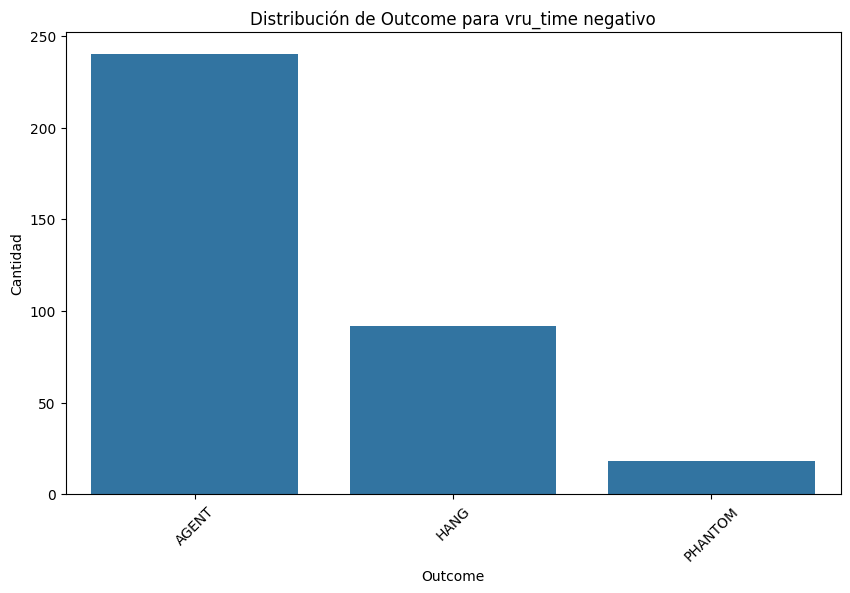

In [17]:
archivo_negativo = archivo[archivo['vru_time'] < 0]
plt.figure(figsize=(10, 6))
sns.countplot(x='outcome', data=archivo_negativo)
plt.title('Distribución de Outcome para vru_time negativo')
plt.xlabel('Outcome')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

En este caso se verifica que una gran cantidad de las llamadas que tienen un vru_time negativo tienen como outcome = agent lo que significa que se dio servicio por lo que podemos concluir que es un error de calculo debido a que parecen estar invertidos los datos de vru_entry y vru_exit

Se crean nuevas columnas con los valores corregidos de vru_entry y vru_exit para poder crear la columna de vru_time corregida

In [18]:
#archivo['nueva_columna'] = np.where(condicion, valor_si_condicion_verdadera, valor_si_condicion_falsa)
archivo["vru_entry_corregido"]= np.where(archivo['vru_entry'] > archivo['vru_exit'], archivo['vru_exit'], archivo['vru_entry'])
archivo["vru_exit_corregido"]= np.where(archivo['vru_entry'] > archivo['vru_exit'], archivo['vru_entry'], archivo['vru_exit'])

In [19]:
archivo["vru_time_corregido"] = (archivo["vru_exit_corregido"] - archivo["vru_entry_corregido"]).dt.total_seconds()
archivo["vru_time_corregido"]= archivo["vru_time_corregido"].astype("Int64")
archivo[archivo["vru_time"]<0].head(5)

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,vru_entry_corregido,vru_exit_corregido,vru_time_corregido
2786,AA0214,12150,29680238.0,1,PS,1999-01-03,2023-11-02 13:55:04,2023-11-02 13:54:24,-40,2023-11-02 13:54:24,2023-11-02 13:56:10,106,AGENT,2023-11-02 13:56:09,2023-11-02 13:57:28,79,KAZAV,2023-11-02 13:54:24,2023-11-02 13:55:04,40
3484,AA0106,34252,59630624.0,1,PS,1999-01-04,2023-11-02 14:51:15,2023-11-02 14:50:33,-42,2023-11-02 14:50:33,2023-11-02 14:51:45,72,HANG,2023-11-02 00:00:00,2023-11-02 00:00:00,0,NO_SERVER,2023-11-02 14:50:33,2023-11-02 14:51:15,42
4226,AA0204,32267,58720558.0,2,PS,1999-01-04,2023-11-02 23:49:39,2023-11-02 23:48:48,-51,2023-11-02 23:48:48,2023-11-02 23:50:28,100,AGENT,2023-11-02 23:50:28,2023-11-02 23:52:17,109,BENSION,2023-11-02 23:48:48,2023-11-02 23:49:39,51
4476,AA0209,31205,25486903.0,2,PS,1999-01-04,2023-11-02 16:26:49,2023-11-02 16:25:58,-51,2023-11-02 16:25:58,2023-11-02 16:32:35,397,AGENT,2023-11-02 16:32:35,2023-11-02 16:33:54,79,YITZ,2023-11-02 16:25:58,2023-11-02 16:26:49,51
4559,AA0213,12195,17923889.0,0,PS,1999-01-04,2023-11-02 14:56:35,2023-11-02 14:55:40,-55,2023-11-02 14:55:40,2023-11-02 14:56:43,63,AGENT,2023-11-02 14:56:43,2023-11-02 14:58:59,136,MICHAL,2023-11-02 14:55:40,2023-11-02 14:56:35,55


In [20]:
# Verificamos que no quede ningun valor negativo en vru_time_corregido
valores_neg2= (archivo["vru_time_corregido"]< 0).sum()
print(f"La cantidad de valores negativos es:{valores_neg2}")
porcentaje_negativos2= round((valores_neg2/archivo["vru_time"].count())*100, 2)
print(f"El porcentaje de valores negativos sobre el total es de:{porcentaje_negativos2}")
archivo["vru_time_corregido"].describe()

La cantidad de valores negativos es:0
El porcentaje de valores negativos sobre el total es de:0.0


count     444448.0
mean     10.396357
std      34.909485
min            0.0
25%            6.0
50%            8.0
75%           10.0
max         4832.0
Name: vru_time_corregido, dtype: Float64

### 2) Date

Mes
1     31599
2     33344
3     38801
4     32036
5     39553
6     37935
7     39022
8     42078
9     31371
10    34625
11    41019
12    43065
dtype: int64


Text(0, 0.5, 'Cantidad de llamados')

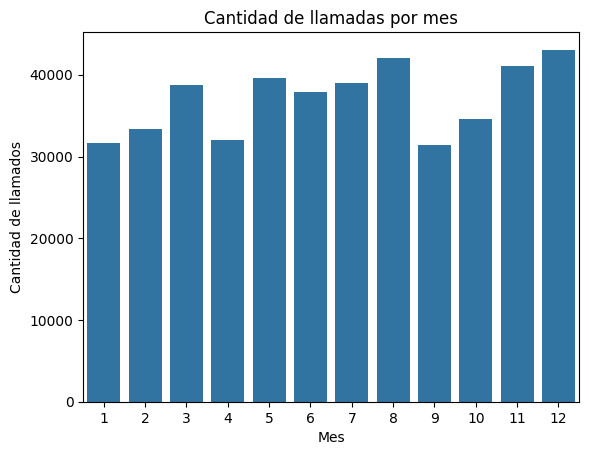

In [21]:
#Realizamos una grafica de cantidad de llamadas por mes 
archivo["Mes"]= archivo["date"].dt.month
llamadas_por_mes = archivo.groupby("Mes").size()
print(llamadas_por_mes)
sns.barplot(data=llamadas_por_mes)
plt.title("Cantidad de llamadas por mes")
plt.ylabel("Cantidad de llamados")

En este caso se verifica que los meses que se recibieron menos llamados son enero, abril y septiembre mientras que los meses que se recibieron mas llamados son agosto y diciembre

### 3) q_start, q_exit y q_time

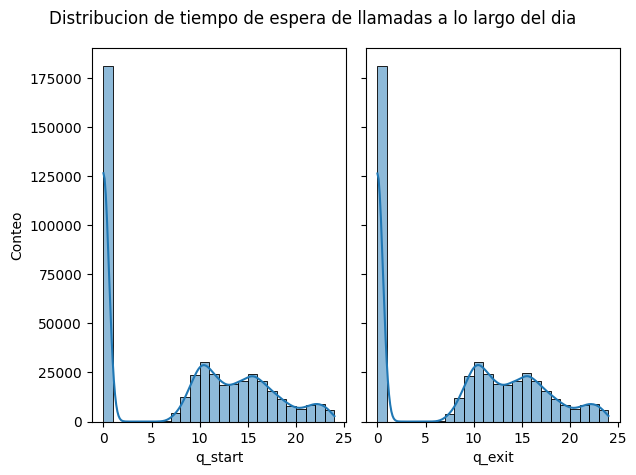

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.histplot(data=archivo, x=(archivo['q_start'] - archivo['q_start'].dt.normalize()) / pd.Timedelta(hours=1), bins=24, kde=True, ax=ax1)
sns.histplot(data=archivo, x=(archivo['q_exit'] - archivo['q_exit'].dt.normalize()) / pd.Timedelta(hours=1), bins=24, kde=True, ax=ax2)

ax1.set_xlabel('q_start') ; ax1.set_ylabel('Conteo')
ax2.set_xlabel('q_exit')
plt.suptitle('Distribucion de tiempo de espera de llamadas a lo largo del dia ')
plt.tight_layout()
plt.show()

In [45]:
conteo_medianoche = (archivo['q_start'].dt.time == pd.to_datetime('00:00:00').time()).sum()
total_llamadas = archivo['q_start'].count()
porcentaje_decortes = round(conteo_medianoche / total_llamadas * 100, 2)
print(f"La cantidad de personas que abandonaron la llamada estando en vru:{conteo_medianoche}")
print(f"El porcentaje de clientes que abandonaron la llamada es: {porcentaje_decortes}%")

La cantidad de personas que abandonaron la llamada estando en vru:180837
El porcentaje de clientes que abandonaron la llamada es: 40.7%


Los valores altos en cero indican que un número significativo de llamadas fueron abandonadas por los clientes mientras estaban en la cola. Esto es un problema importante, ya que las llamadas abandonadas pueden indicar que los clientes están descontentos con el servicio o que no pueden esperar en la cola.

Observando el grafico tambien hay que tener en cuenta que los clientes con prioridad alta se les asigna 1.5 minutos mas para avanzar en la cola por lo que hay que modificar esos datos para tener los reales 

In [24]:
condicion = archivo["priority"] == 2
archivo_filtrado = archivo.loc[condicion, ["q_start", "q_exit", "q_time"]]
archivo_filtrado.head()

,q_start,q_exit,q_time
0,2023-11-02 00:00:36,2023-11-02 00:03:09,153
2,2023-11-02 06:55:26,2023-11-02 06:55:43,17
7,2023-11-02 08:42:19,2023-11-02 08:42:23,4
9,2023-11-02 09:04:10,2023-11-02 09:04:56,46
11,2023-11-02 09:27:09,2023-11-02 09:28:00,51


In [25]:
condiciones = [
    (archivo['priority'] == 2),
    (archivo['priority'] != 2)]

valores = [np.maximum(archivo['q_time'] - 90, 0), 
    archivo['q_time'] ]

archivo['q_time_real'] = np.select(condiciones, valores, default=0)
archivo.head()

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,...,outcome,ser_start,ser_exit,ser_time,server,vru_entry_corregido,vru_exit_corregido,vru_time_corregido,Mes,q_time_real
0,AA0101,33116,9664491.0,2,PS,1999-01-01,2023-11-02 00:00:31,2023-11-02 00:00:36,5,2023-11-02 00:00:36,...,HANG,2023-11-02 00:00:00,2023-11-02 00:00:00,0,NO_SERVER,2023-11-02 00:00:31,2023-11-02 00:00:36,5,1,63
1,AA0101,33117,0.0,0,PS,1999-01-01,2023-11-02 00:34:12,2023-11-02 00:34:23,11,2023-11-02 00:00:00,...,HANG,2023-11-02 00:00:00,2023-11-02 00:00:00,0,NO_SERVER,2023-11-02 00:34:12,2023-11-02 00:34:23,11,1,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,2023-11-02 06:55:20,2023-11-02 06:55:26,6,2023-11-02 06:55:26,...,AGENT,2023-11-02 06:55:43,2023-11-02 06:56:37,54,MICHAL,2023-11-02 06:55:20,2023-11-02 06:55:26,6,1,0
3,AA0101,33119,0.0,0,PS,1999-01-01,2023-11-02 07:41:16,2023-11-02 07:41:26,10,2023-11-02 00:00:00,...,AGENT,2023-11-02 07:41:25,2023-11-02 07:44:53,208,BASCH,2023-11-02 07:41:16,2023-11-02 07:41:26,10,1,0
4,AA0101,33120,0.0,0,PS,1999-01-01,2023-11-02 08:03:14,2023-11-02 08:03:24,10,2023-11-02 00:00:00,...,AGENT,2023-11-02 08:03:23,2023-11-02 08:05:10,107,MICHAL,2023-11-02 08:03:14,2023-11-02 08:03:24,10,1,0


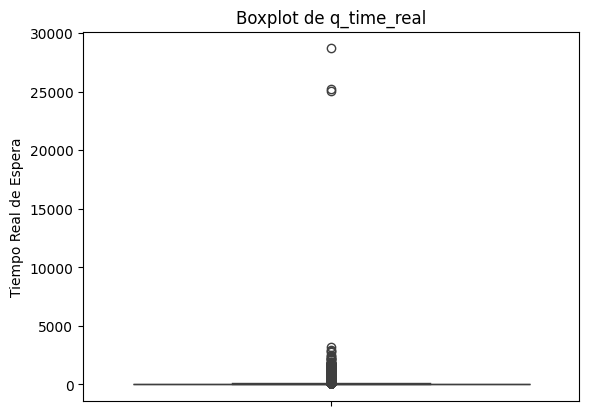

In [26]:
sns.boxplot(data=archivo, y='q_time_real')
plt.ylabel('Tiempo Real de Espera')
plt.title('Boxplot de q_time_real')
plt.show()

Se observan valores que superan los 25000 segundos de espera que representan outliers por lo que se quitan del grafico

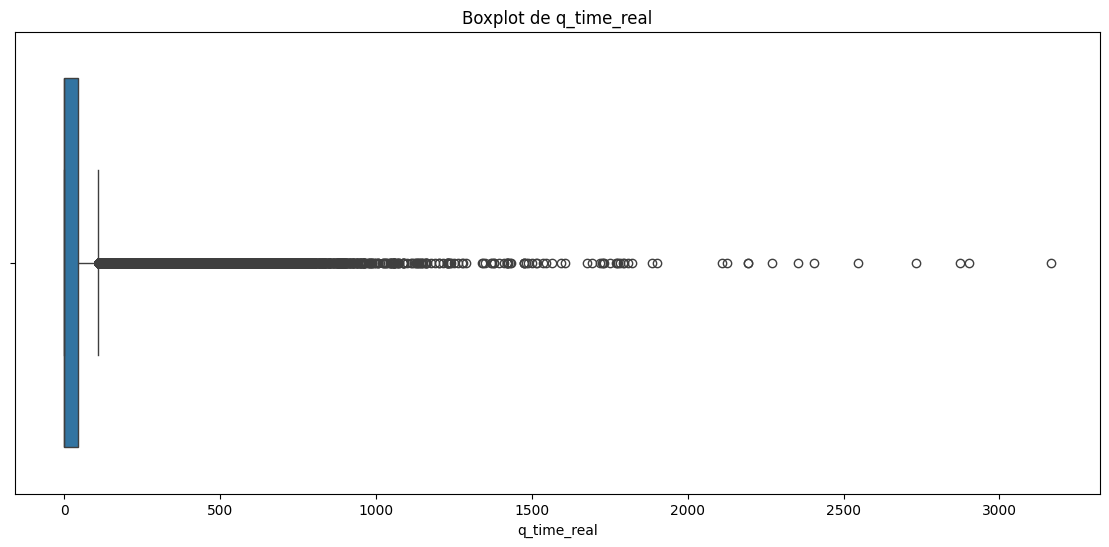

In [27]:
archivo= archivo[archivo["q_time_real"]<20000]
fig = plt.figure(figsize=(14, 6))
sns.boxplot(data=archivo, x='q_time_real')
plt.title('Boxplot de q_time_real')
plt.show()

In [33]:
cuenta_outliers= (archivo["q_time_real"]>2000).sum()
cuenta_outliers2 = (archivo["q_time_real"]>1000).sum()
porc_outliers= round((cuenta_outliers/archivo["q_time_real"].count())*100,2)
porc_outliers2= round((cuenta_outliers2/archivo["q_time_real"].count())*100,2)
print(f"La cantidad de outliers sobre 2000 seg es de {cuenta_outliers} y la cantidad sobre 1000 seg es de {cuenta_outliers2}")
print(f"El porcentaje de outliers sobre 2000 seg es de {porc_outliers} y el porcentaje sobre 1000 seg es de {porc_outliers2}")

La cantidad de outliers sobre 2000 seg es de 12 y la cantidad sobre 1000 seg es de 131
El porcentaje de outliers sobre 2000 seg es de 0.0 y el porcentaje sobre 1000 seg es de 0.03


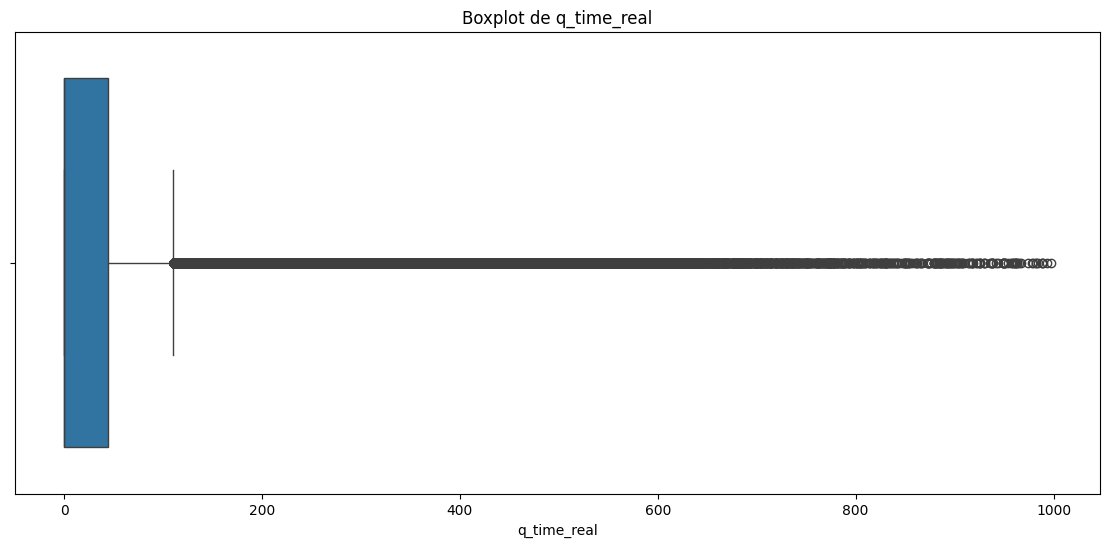

In [34]:
# Seguimos eliminando outliers para poder realizar las graficas correctas
archivo= archivo[archivo["q_time_real"]<1000]
fig = plt.figure(figsize=(14, 6))
sns.boxplot(data=archivo, x='q_time_real')
plt.title('Boxplot de q_time_real')
plt.show()

Ya con los valores corregidos vamos a ver en analisis estadistico de la nueva variable

In [41]:
archivo["q_time_real"].describe()

count    444314.000000
mean         41.711245
std          87.366453
min           0.000000
25%           0.000000
50%           0.000000
75%          44.000000
max         997.000000
Name: q_time_real, dtype: float64

### 4) ser_start, ser_exit y ser_time

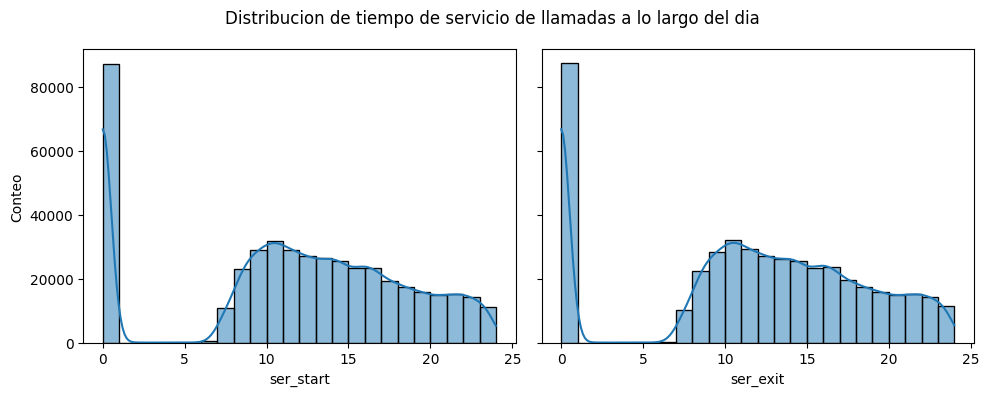

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
sns.histplot(data=archivo, x=(archivo["ser_start"] - archivo["ser_start"].dt.normalize()) / pd.Timedelta(hours=1), bins=24, kde=True, ax=ax1)
sns.histplot(data=archivo, x=(archivo["ser_exit"] - archivo["ser_exit"].dt.normalize()) / pd.Timedelta(hours=1), bins=24, kde=True, ax=ax2)

ax1.set_xlabel("ser_start") ; ax1.set_ylabel('Conteo')
ax2.set_xlabel("ser_exit")
plt.suptitle('Distribucion de tiempo de servicio de llamadas a lo largo del dia ')
plt.tight_layout()
plt.show()

In [44]:
conteo_medianoche2 = (archivo["ser_start"].dt.time == pd.to_datetime('00:00:00').time()).sum()
total_llamadas = archivo["ser_start"].count()
porcentaje_decortes = round(conteo_medianoche / total_llamadas * 100, 2)
print(f"La cantidad de personas que abandonaron el llamado inmediatamente fueron: {conteo_medianoche2}")
print(f"El porcentaje de clientes que abandonaron la llamada es: {porcentaje_decortes}%")

La cantidad de personas que abandonaron el llamado inmediatamente fueron: 87084
El porcentaje de clientes que abandonaron la llamada es: 40.7%


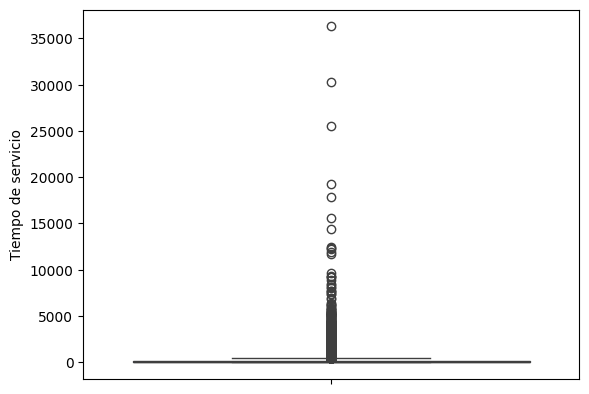

In [46]:
sns.boxplot(data=archivo, y="ser_time")
plt.ylabel("Tiempo de servicio")
plt.show()

In [54]:
cuenta_outliers3= (archivo["ser_time"]>20000).sum()
porc_outliers3= round((cuenta_outliers3/archivo["ser_time"].count())*100,2)
print(f"La cantidad de outliers sobre 20000 seg es de {cuenta_outliers3} y el porcentaje es de {porc_outliers3}")
cuenta_outliers4= (archivo["ser_time"]>10000).sum()
porc_outliers4= round((cuenta_outliers4/archivo["ser_time"].count())*100,2)
print(f"La cantidad de outliers sobre 15000 seg es de {cuenta_outliers4} y el porcentaje es de {porc_outliers4}")

La cantidad de outliers sobre 20000 seg es de 0 y el porcentaje es de 0.0
La cantidad de outliers sobre 15000 seg es de 0 y el porcentaje es de 0.0


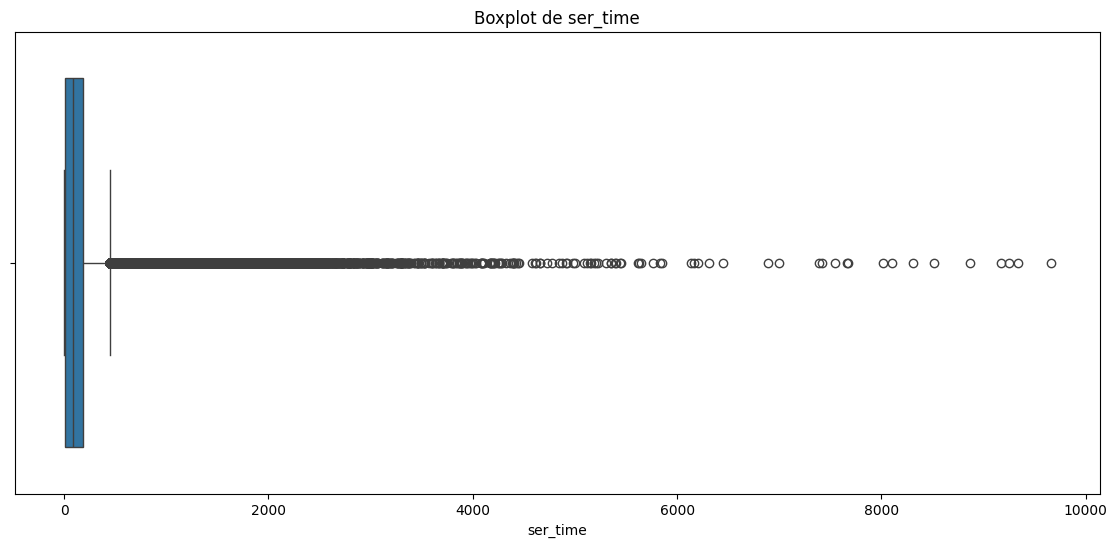

In [49]:
archivo= archivo[archivo["ser_time"]<10000]
fig = plt.figure(figsize=(14, 6))
sns.boxplot(data=archivo, x="ser_time")
plt.title("Boxplot de ser_time")
plt.show()

In [61]:
cuenta_outliers5= (archivo["ser_time"]>6000).sum()
porc_outliers5= round((cuenta_outliers5/archivo["ser_time"].count())*100,2)
print(f"La cantidad de outliers sobre 6000 seg es de {cuenta_outliers5} y el porcentaje es de {porc_outliers5}")
cuenta_outliers6= (archivo["ser_time"]>4000).sum()
porc_outliers6= round((cuenta_outliers6/archivo["ser_time"].count())*100,2)
print(f"La cantidad de outliers sobre 4000 seg es de {cuenta_outliers6} y el porcentaje es de {porc_outliers6}")
cuenta_outliers7= (archivo["ser_time"]>1000).sum()
porc_outliers7= round((cuenta_outliers7/archivo["ser_time"].count())*100,2)
print(f"La cantidad de outliers sobre 2000 seg es de {cuenta_outliers7} y el porcentaje es de {porc_outliers7}")

La cantidad de outliers sobre 6000 seg es de 0 y el porcentaje es de 0.0
La cantidad de outliers sobre 4000 seg es de 0 y el porcentaje es de 0.0
La cantidad de outliers sobre 2000 seg es de 5558 y el porcentaje es de 1.25


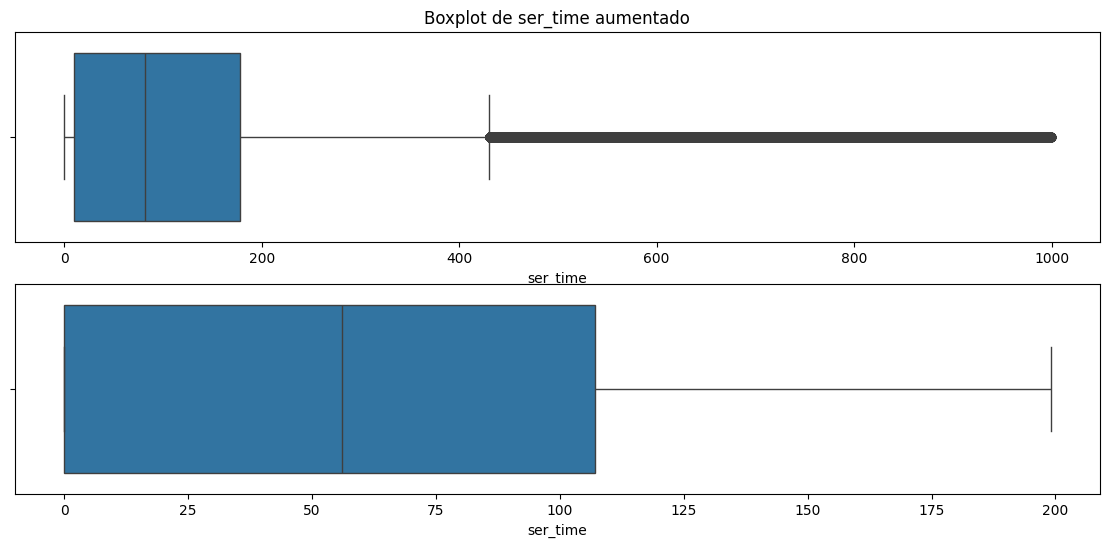

In [62]:
archivo= archivo[archivo["ser_time"]<1000]
fig = plt.figure(figsize=(14, 6))
ax_1 = fig.add_subplot(211)
sns.boxplot(data=archivo, x="ser_time", ax=ax_1)
ax_1.set_title("Boxplot de ser_time")
ax_2 = fig.add_subplot(212)
sns.boxplot(data=archivo[archivo["ser_time"]<200], x="ser_time", ax=ax_2)
ax_1.set_title("Boxplot de ser_time aumentado")
plt.show()

In [63]:
archivo["ser_time"].describe()

count    438506.000000
mean        133.619157
std         164.918332
min           0.000000
25%          10.000000
50%          82.000000
75%         178.000000
max         999.000000
Name: ser_time, dtype: float64

# Variables cualitativas

### 1) Vru_line

### 2) Call_id

In [36]:
#verificamos si tenemos call_id duplicados dado que es una variable identicatoria
hay_duplicados = archivo['call_id'].duplicated().any()
if hay_duplicados:
    print("Hay call_id duplicados.")
else:
    print("No hay call_id duplicados.")

#Tenemos que crear un call_id unico para cada llamada 
archivo["unique_call_id"] = archivo["vru.line"] + '' + archivo["call_id"]

Hay call_id duplicados.


In [37]:
#Verificamos si la nueva variable tiene valores duplicados 
hay_duplicados2 = archivo['unique_call_id'].duplicated().any()

# Imprimir el resultado
if hay_duplicados2:
    print("Hay valores duplicados en la columna 'unique_call_id'.")
else:
    print("No hay valores duplicados en la columna 'unique_call_id'.")

No hay valores duplicados en la columna 'unique_call_id'.


### 3) Customer_id

### 4) Priority

### 5) Type

In [38]:
archivo["type"].value_counts()

type
PS     302494
NW      67694
NE      39332
IN      20671
TT      12289
PE       1823
 TT         6
AA          5
Name: count, dtype: int64

In [39]:
archivo["type"] = archivo["type"].str.strip()
archivo["type"].value_counts()

type
PS    302494
NW     67694
NE     39332
IN     20671
TT     12295
PE      1823
AA         5
Name: count, dtype: int64

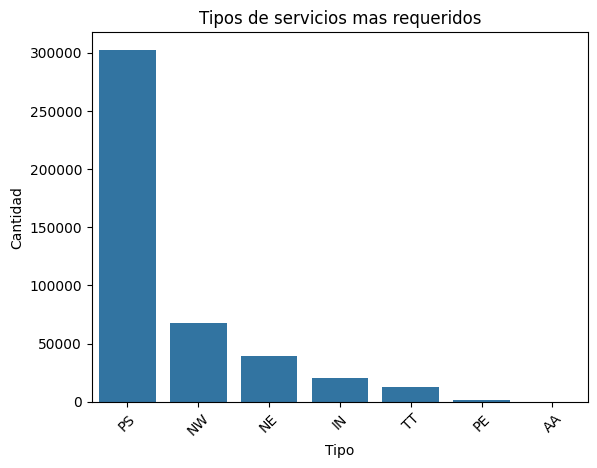

In [40]:
value_counts = archivo["type"].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.title('Tipos de servicios mas requeridos')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mayor claridad
plt.show()

En este caso observamos que el servicio mas demandado por los clientes es PS lo que indica actividad regular

### 6) Outcome

### 7) Server